# Visualization

***

## Description

Data visualization is the most effective way of inspecting and communicating results. This tutorial will help you how to visualize data effectively with the help of `matplotlib` and `seaborn` packages 


## Overview

- Terminologies in `matplotlib` 
- Tyoes of plots for categorical and numerical data
- Plot customizations
- Visualization with `seaborn`


## Pre-requisites

- Base Python
- NumPy, Pandas
- Basic statistics knowledge (mean, median, mode, standard deviation) would be helpful but not mandatory


## Learning objective

- Build custom plots with `matplotlib` and `seaborn`
- Catch trends, anomalies and patterns in data with visualizing data

## Chapter 1: Visualization with pandas

### Description

In this chapter you are going to see why visualization is important, and a brief introduction to the `matplotlib` library along with the anatomy of such a plot

### 1.1 Why data visualization?

***

"The data is a mess" - This was the statement reiterated by every data scientist when asked what was the most difficult part of the job according to [a report by Harvard Business Review](https://hbr.org/2016/12/why-youre-not-getting-value-from-your-data-science). It was found that the problem was not with the quality of the data (noisy/clean) but that the size of data is too overwhelming to derive any insights. 

Let's look at a snapshot of the US 2016 Election data by electoral votes polled per state to each candidate.
Source: [Offical 2016 Election Results](https://transition.fec.gov/pubrec/fe2016/2016presgeresults.pdf)

![snapshot](../images/election_data_2016.png)

Deriving meaningful insights from this data as to how many states Trump has won in comparison to Clinton is not seen clearly. Now, look at this image w.r.t the same data. 

<img src="../images/election.png" width="700" height="500">

The image above conveyed a lot about the 2016 US Presidential election in one single frame. 

This is the power of Data visualization. It is an effective way to observe trends, anomalies as well as patterns in the data. More importantly, it is also the one of the simplest and the best communicator for your results. Thus data visualisation is an important tool in the arsenal of a data scientist. 
   
Visualization comes very easy in Python, as it offers libraries like `matplotlib`, `seaborn`, `bokeh`, `plotly` etc. In this concept we will be discussing how to use `matplotlib` to visualize data effectively.

### 1.2 Bar-chart and anatomy of a plot 

***

In the previous concept, you have done extensive work on the Pokemon dataset. Let's continue working on the same dataset. Imagine a layman Pokemon enthusiast has come to you with a set of questions about Pokemons. How would you answer them? 

Let's start with one of the questions asked in the previous concept - `How many different variants of Type 1 pokemons are there along with the counts?`. First you have to perform data wrangling on pandas to come to the right data. 

~~~python
import pandas as pd

# load data
df = pd.read_csv('../data/pokemon.csv')

# reset index to 'Name'
df.set_index('Name', inplace=True)

# drop column '#'
df.drop('#', inplace=True, axis=1)

type_1_data = df['Type 1'].value_counts()
~~~
We have now come to the right form of data that contains the answer. But is there an interesting way to onboard the answer to our friend? Well, a picture is worth a thousand words. And thankfully with Python’s `matplotlib` library, it fortunately takes far less than a thousand words of code to create a production-quality graphic. 

Let's look at a simple plot of the data constructed with default values. We will be using `bar` plot to show the result. A **bar chart** or bar graph is a chart or graph that presents grouped data with rectangular bars with lengths proportional to the values that they represent. Bar plots can be both vertical and horizontal. **To draw bar charts, we require two arrays; one representing the categories and the other denoting the heights of individual categories**. 

<img src="../images/bad_graph.png" width="700" height="500"/>

Look at the plots and can you see what is wrong? The plot has no information about what it is trying to show and no proper labels to clearly tell what they actually mean. The labels on the x-axis also are completely overlapping. We need to fix this. To do that, first we need to understand the basic anatomy of a plot made up of two important objects - `Figure` and `Axes`

- **`Figure`**: A Figure object is the outermost container for a `matplotlib` graphic. Within the **Figure**, everything else is contained. You can choose to create multiple independent figures.

- **`Axes`**: This actually refers to an individual plot and is added to a `Figure`; so, a `Figure` can contain multiple `Axes`. Usually we'll set up an `Axes` with a call to `subplot` (you will learn about subplots in the later chapters).

Further, each `Axes` has an `XAxis` and a `YAxis`. These contain the **ticks, tick locations, labels** etc. Almost every 'element' of a chart is its own manipulable Python object. But for our purpose, a basic understanding is sufficient. You will get a better understanding of the difference between a `Figure` and `Axes` in the snapshot below:

 <img src="../images/anatomy.png" width="700" height="500"/>
 
 Now we will try to fix the bar chart that we have created using matplotlib. The steps we would need to do are:-
 - adjust the size of the image so that the xticks become visible. 
 - label the x-axis and y-axis with meaningful labels.
 - give a title for the plot. 
 
 We will apply these fixes to the plot and revisualize the plot and see if we can show it better. The labels for axes and the title must be concise and as self-explanatory as possible. 

The steps generally associated with generating a plot through `matplotlib` are:
- First, importing `matplotlib.pyplot` as `plt` (customary)
- Initialize the figure with `plt.figure()`. It is the entire drawing canvas and you can adjust its size with the argument `figsize()`
- Then we label each of the axes through `plt.xlabel()` and `plt.ylabel`. 
- Next, we title the plot using `plt.title()`
- Finally build and show the plot with `plt.bar()`

Some of the steps are interchangeable like we can build the plot and label later, but it is a good practice to follow a neat sequence of steps. 

~~~python
import matplotlib.pyplot as plt
%matplotlib inline

# initialize the figure
plt.figure(figsize=[14,8])

# label the axes
plt.xlabel("Type 1 Pokemon Variants")
plt.ylabel("No of Pokemons")

# title the plot
plt.title("Distribution of pokemons across various Type 1 variants")

# build and show the plot
plt.bar(type_1.index,type_1_data)
~~~

After executing the code, let's look at how the figure looks like. 
<img src="../images/corrected_graph.png" width="700" height="500"/>

This looks much better and gives the answer directly to our pokemon enthusiast friend about the different `Type 1` variants and their respective counts. Of course the plot can be made better with legends and colours, which we will see in the next chapter. 

Additionally from the pandas dataframe itself you can call the plot function and plot the same data. The internal defaults are a little different, so the graph might look little different. But, essentially it is the same visualization. 

~~~python
# keeping the same axis labels as earlier
df['Type 1'].value_counts().plot(kind="bar")
~~~

<img src="../images/bar_plot_pandas.png" width="700" height="500"/>


**Why use bar charts?**

If you have comparative data that you would like to represent through a chart then a bar chart is the best option. A bar chart uses bars to show comparisons between categories of data. These bars can be displayed horizontally or vertically. A bar graph will always have two axis. One axis will generally have numerical values, and the other will describe the types of categories being compared.


**Advantages and disadvantages of using bar charts**

- Advantage is the bar chart is easy to read and understand. You get a good overview of values when using bar charts.
- The bar chart does not work so well with many dimension values due to the limitation of the axis length. 

## Visualize counts of Pokemons according to `Type 2` in a sorted manner using bar-chart

In this task you will draw a bar-chart to depict the count distribution of Pokemons according to `Type 2` in sorted (descending) manner


### Instructions
- First generate a pandas Series object `type_2` that stores the count for every `Type 2` in descending order using `.value_counts(ascending=False)` 
- On `type_2` use `.plot(kind='bar')` to generate a bar chart showing the counts for different variants of `Type 2`
- Finally use `.show()` to display the plot

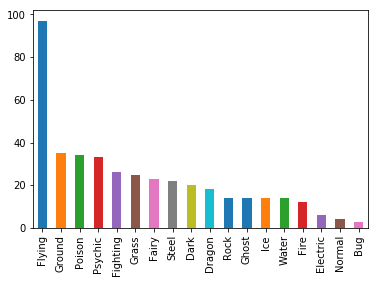

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
df = pd.read_csv('../data/pokemon.csv')

# reset index to 'Name'
df.set_index('Name', inplace=True)

# drop column '#'
df.drop('#', inplace=True, axis=1)

# Code starts here

# Counts for 'Type 2' counts in descending order
type_2 = df['Type 2'].value_counts(ascending=False)

# bar chart
type_2.plot(kind='bar')

# display plot
plt.show()

# Code ends here

## Hints
- Initialize `type_2` which is a pandas series object displaying the counts for all variants for `Type 2` in descending order of counts using `res = df['Type 2'].value_counts(ascending=False)`
- Generate the bar chart using `res.plot(kind='bar')`
- Don't forget to use `plt.show()` to display the plot

### 1.3 Line Plots and Plot Customizations

***

**What is a line plot?**

Line plots are simple charts used to display series of data points connected by straight line segments. The X-axis lists the categories equally and the y-axis represents the corresponding category values. This kind of graph serves to visualize a trend summarized from data periodically and hence has wide applications in time series data. Some popular use cases of line graphs include the price trend of stocks, weather changes during a year etc. 


**Example**

Lets answer this question: How does the mean attack (`Attack`) points `Type 1` Pokemons fare against `Type 2` Pokemons? 

The steps to answer this question are:
- First group Pokemons together by their `Type 1` and `Type 2` and calculate the mean `Attack` points for every variant
- Plot them out as line plots in the same plot with types on the X-axis and mean attack points on the Y-axis

You will get a graph that looks like this:

<img src='../images/lmplot.png'>

The plot above helps in giving a clear comparison of the mean attack points for different variants of `Type 1` (**depicted by blue line**) and `Type 2` (**depicted by orange line**)


**Code for implementing line plot**

The code for implementing line plot is quite simple:

```python
plt.plot(x, y)
```
where `x` and `y` are the two arrays we want to plot on X-axis and Y-axis respectively.


**Advantages and disadvantages**

- The line chart is easy to understand and gives an instant perception of trends.
- Sometimes it might mess the entire chart if many categories are compared in one line chart.


**Why is it a good practice to customize your plot?**

We will answer this question by asking a set of questions. Suppose you are looking at the above image for the very first time. Can you answer these questions?
- What does the X-axes and Y-axes represent?
- Overall what does the line chart represent?

Obviously not. Thats where plot customizations come to the rescue. You can customize your plot to make it unique and pleasing to the eye and depicting the important details; all at the same time. Across different plots, these elements (customizations) more or less remain the same. *Many types of customizations can be done to customize a plot; adjusting the colors, changing markers, linestyles and linewidths, adding text, legend and annotations, and changing the limits and layout of your plots.* 


**Widely used plot customizations**

Below are some of the widely used customization operations that you would be performing while using matplotlib:


1) **Adjusting size of the figure**: You can change of the figure using `plt.figure(figsize=(x,y))` where you can set `x` and `y` values to satisfy your requirements  

2) **Axes labels and title**: Use `plt.title('Title')` on the axes to set the title of the plot and `plt.xlabel('xlabel')`, `plt.ylabel('ylabel')` to set the labels

3) **Axes limits**: Use `plt.xlim((a,b))` and `plt.ylim((a,b))` to fix the boundaries in the range (a,b) within which you want to display the plot

4) **Changing color**: Use the `color` argument inside the different types of plot functions to change its color.

5) **Legends**: In case we have multiple types of charts in single plot, you can differentiate them with legends. Use `plt.legend()` to display legends with the help of the **labels** keyword argument inside it. To  

6) **Save figure**: You can easily save a figure to, for example, a **png** file by making use of `plt.savefig()`. The only argument you need to pass to this function is the file name, just like in this example: 

```python
# Save Figure
plt.savefig("foo.png")

# Save Transparent Figure
plt.savefig("foo.png", transparent=True)
```

The line plot now looks like this after applying plot customizations:

<img src='../images/lmp.png'>

Doesn't it look better than the previous unlabelled plot in terms of information? Definitely yes.  

## How does the mean attack points (`Attack`) for `Type 1` Pokemons fare against `Type 2`?

In this task you will use a line plot to compare the mean attack points (`Attack`) for `Type 1` and `Type 2` Pokemons

### Instructions
- Create a dataframe `type_1` by grouping different categories of `Type 1` based on their mean attack (`Attack`) values using `.groupby(['Type 1'])['Attack'].mean()`.  
- In a similar manner create dataframe `type_2` for grouping categories of `Type 2` based on their mean attack values
- Reset index permanently for both `type_1` and `type_2` using `.reset_index(inplace=True)`
- Merge both `type_1` and `type_2` using `.merge()`. Carefully chose `left_on` and `right_on` arguments inside the `.merge()` method and save it as `merged`
- Drop `Type 1` column permanently from `merged` using `.drop(['Type 1'], axis=1, inplace=True)`
- Rename `'Type 2'` column from `merged` as `Type` using `.rename()`
- First set the figure size using `plt.figure(figsize=(14,8))`
- Generate a red colored line plot for `'Type 1'` Pokemon mean attack points using `plt.plot(merged['Type 1'], merged['Attack_x'], color='red)`
- Generate a blue colored line plot for `'Type 2'` Pokemon mean attack points in a similar fashion; just replace  'Attack_x' with 'Attack_y' and 'red' with 'blue'
- Set X-axis label as `'Types'` using `plt.xlabel()`
- Set Y-axis label as `'Mean Attack points'` using `plt.ylabel()`
- Set the plot title as `'Comparison of Mean Attack Points for variants of Type 1 and Type 2'` using `plt.title()`
- Set the Y-axis limit between $(45, 120)$ using `plt.ylim((45, 120))`
- Set legend with axis labels as`['Type1', 'Type 2']` as `plt.legend(labels=['Type1', 'Type 2'])`
- Display the plot using `plt.show()`

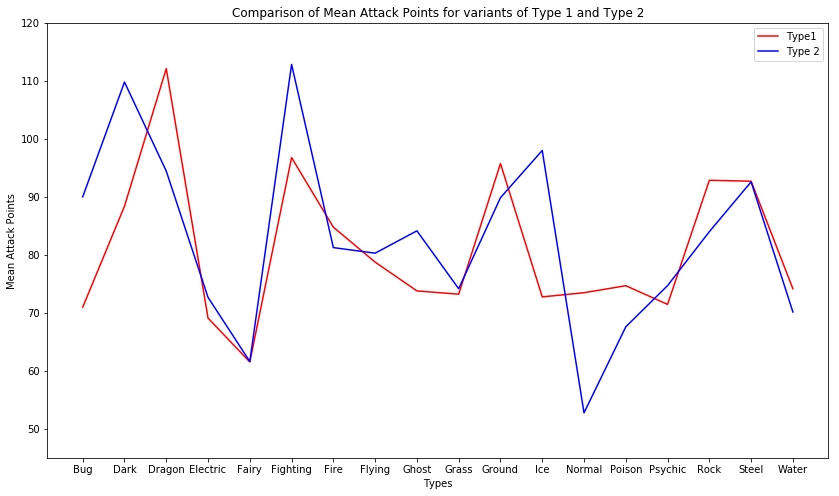

In [2]:
# Code starts here

# Type 1 mean attack points dataframe for every category
type_1 = pd.DataFrame(df.groupby(['Type 1'])['Attack'].mean())

# Type 2 mean attack points dataframe for every category
type_2 = pd.DataFrame(df.groupby(['Type 2'])['Attack'].mean())

# Reset index for both dataframes
type_2.reset_index(inplace=True)
type_1.reset_index(inplace=True)

# Merge both dataframes
merged = pd.merge(type_1, type_2, left_on='Type 1', right_on='Type 2')

# Drop 'Type 1' column permanently
merged.drop(['Type 1'], axis=1, inplace=True)

# Rename column
merged.rename(columns={'Type 2': 'Type'}, inplace=True)

# Set size of the figure
plt.figure(figsize=(14,8))

# Line plot for 'Type 1' Pokemon mean attack points
plt.plot(merged['Type'], merged['Attack_x'], color='red')

# Line plot for 'Type 2' Pokemon mean attack points
plt.plot(merged['Type'], merged['Attack_y'], color='blue')

# Setting X-axis label
plt.xlabel('Types')

# Setting Y-axis label
plt.ylabel('Mean Attack Points')

# Title of the plot
plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')

# Setting Y-axis limit
plt.ylim((45, 120))

# Legend 
plt.legend(labels=['Type1', 'Type 2'])

# Display plot
plt.show()

# Code ends here

## Hints
- Type 1 mean attack points dataframe for every category
`type_1 = pd.DataFrame(df.groupby(['Type 1'])['Attack'].mean())`

- Type 2 mean attack points dataframe for every category
`type_2 = pd.DataFrame(df.groupby(['Type 2'])['Attack'].mean())`

- Reset index for both dataframes
`type_2.reset_index(inplace=True)
type_1.reset_index(inplace=True)`

- Merge both dataframes
`merged = pd.merge(type_1, type_2, left_on='Type 1', right_on='Type 2')`

- Drop 'Type 1' column permanently
`merged.drop(['Type 1'], axis=1, inplace=True)`

- Rename column
`merged.rename(columns={'Type 2': 'Type'}, inplace=True)`

- Set size of the figure
`plt.figure(figsize=(14,8))`

- Line plot for 'Type 1' Pokemon mean attack points
`plt.plot(merged['Type'], merged['Attack_x'], color='red')`

- Line plot for 'Type 2' Pokemon mean attack points
`plt.plot(merged['Type'], merged['Attack_y'], color='blue')`

- Setting X-axis label
`plt.xlabel('Types')`

- Setting Y-axis label
`plt.ylabel('Mean Attack Points')`

- Title of the plot
`plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')`

- Setting Y-axis limit
`plt.ylim((45, 120))`

- Legend 
`plt.legend(labels=['Type1', 'Type 2'])`

- Display plot
`plt.show()`

## Chapter 2: Types of plots

***

### Description

In this chapter you will learn about the different types of plots, where and how to use them 

### 2.1 Stacked bar chart

***

In the previous chapter you had already plotted a bar chart. A bar chart is a powerful visualization capable of representing category counts for a particular feature and can be either horizontal or vertical. But there is another kind of bar chart called **stacked bar chart** which can factor in another feature besides the feature you already have in the X-axis in a bar chart.

Lets say you want to visually inspect the question: **Which type (`Type 1`) of Pokemons have the highest chances of being Legendary?** The roadmap to answer this question would be:
- First group the Pokemons by `Type 1`
- For every variant of `Type 1` calculate the proportions of Legendary and not Legendary within that variant
- Plot them out

Combining `pandas` and `matplotlib` gives an advantage by combining the first two steps i.e. grouping and calculating Legendary counts within each variant. This kind of problem can be effectively visualized with a stacked bar chart. Now lets see how:

```python
# Group and calculate Legendary Pokemons within each variant of 'Type 1'
df.groupby(['Type 1', 'Legendary']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10))

# Label X-axes and Y-axes
plt.xlabel('Type 1')
plt.ylabel('Frequency')

# Rotate X-axes labels
plt.xticks(rotation=45)

# Display plot
plt.show()

```
which displays: 

<img src='../images/stacked_bar.png'>

The above figure shows a stacked bar chart with number of legendary pokemons denoted by **orange** and non-legendary one by **blue**. It is evident from this plot that type (`Type 1`)**`Flying`** has the highest chances of being Legendary.  

## Which generation has the highest chances of being legendary?

In this task you will answer the question: **Which generation (`Generation`) has the highest chances of being legendary (`Legendary`)**

### Instructions
- First group Pokemons by `Generation` and `Legendary` and then calculate the counts for every variant of generation based on legendary status (`True` or `False`). Save this to a variable `res`
- Plot a stacked bar chart using `.plot(kind='bar', stacked=True, figsize=(15,10))` method

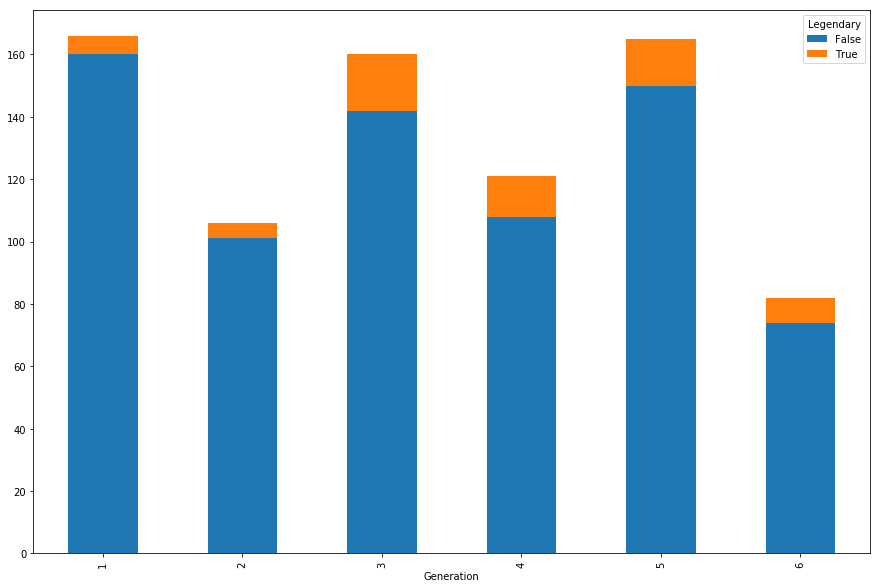

In [3]:
# Code starts here

# Group Pokemons
res = df.groupby(['Generation', 'Legendary']).size().unstack()

# Plot stacked bar chart
res.plot(kind='bar', stacked=True, figsize=(15,10))

# Display plot
plt.show()

# Code ends here

## Hints
- To group Pokemons by `Generation` and `Legendary` to calculate the counts and present it as a dataframe `res` use `res = df.groupby(['Generation', 'Legendary']).size().unstack()`
- You can draw a stacked bar-chart using `res.plot(kind='bar', stacked=True, figsize=(15,10))`
- Finally display the plot with `plt.show()`

### 2.2 Histogram

***

**What is a histogram and why do you need it?**

A histogram is a plot that lets you discover, and show, the underlying shape of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. Note that it requires only one array or series since it displays the frequencies.


**How to construct a histogram using matplotlib?**

Matplotlib's `.hist()` method provides an easy way of generating histograms. To construct a histogram from a continuous variable you first need to split the data into intervals, called **bins**. Each bin contains the number of occurrences of scores in the data set that are contained within that bin. Below are two plots with bins $10$ and $20$ carried out with the feature `HP` of the Pokemon dataset.

<img src='../images/hist_1.png' align='left' width='470'>

<img src='../images/hist_2.png' align='right' width='470'>


**Key takeaways from these plots**

- First and the most important thing; **both these plots are the same**.
- An important concept with histograms is **binning**. Binning is a way to group continuous values into a smaller number of **bins**. More the number of bins, more is the number of intervals that leads to less frequency for every interval and vice versa. In the left image the number of bins are small and so values are tightly packed. The right image has more number of bins, values are loosely packed and hence looks that way. **But always remember that both these plots are the same; the difference in their appearance is due to the different number of bins.**  
- Both these plots have a right tail i.e. have a long tail on the right side
- Some observations have extreme values in the interval $230-260$
- Most of the observations lie in the interval $40-75$


**Difference with bar charts**

Unlike a bar chart, there are no gaps between the bars (*although some bars might be absent reflecting no frequencies*). This is because a histogram represents a continuous data set, and as such, there are no gaps in the data.


**Histograms are based on area of the bars, not height of bars**

In a histogram, it is the area of the bar that indicates the frequency of occurrences for each bin. This means that the height of the bar does not necessarily indicate how many occurrences of scores there were within each individual bin. It is the product of height multiplied by the width of the bin that indicates the frequency of occurrences within that bin. One of the reasons that the height of the bars is often incorrectly assessed as indicating frequency and not the area of the bar is due to the fact that a lot of histograms often have equally spaced bars (bins), and under these circumstances, the height of the bin does reflect the frequency.

## Visualize the distribution of `Attack` points for `Dragon` type (`Type 1`) Pokemons

In this task you will plot the distribution of `Attack` points for Pokemons which have their first type (`Type 1`) as `Dragon`. You will also compare the mean values for `Attack` for all the Pokemons against the mean value of `Attack` for dragon type (by drawing a vertical line).


### Instructions
- Calculate the mean attack points for all the Pokemons and store it in a variable `mean_attack`
- Create a dataframe only for dragon type named `dragons` using conditional filtering (based on `Type 1`) 
- Calculate the mean attack points for only and store it in a variable `mean_dragon`
- Use matplotlib's `.hist()` on `dragon` and pass arguments `column='Attack', bins=8`
- To compare mean attack points you need to draw two lines; one with `mean_attack` and `mean_dragon`
- Use `.axvline()` and pass arguments `x=mean_attack, color='green'` to plot a vertical line representing mean attack points for all the Pokemons
- Use `.axvline()` and pass arguments `x=mean_dragon, color='black'` to plot a vertical line representing mean attack points for Dragon Pokemons

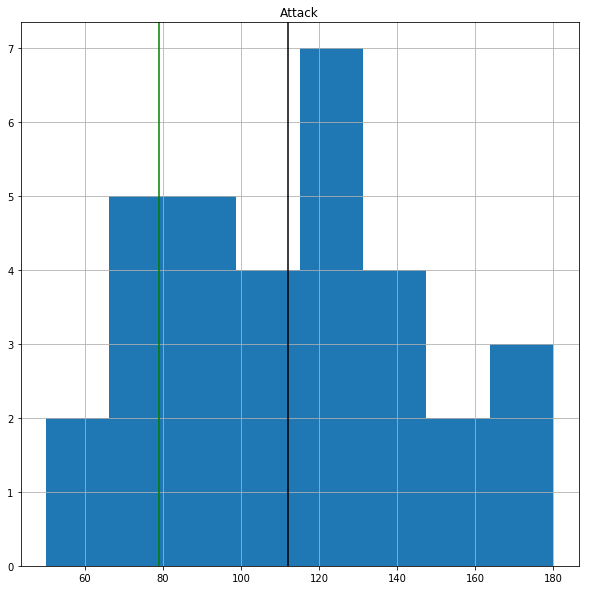

In [4]:
# Code starts here

# Mean 'Attack' for all Pokemons
mean_attack = np.mean(df['Attack'])

# Mean 'Attack' for Dragon type Pokemons
dragon = df[df['Type 1'] == 'Dragon']
mean_dragon = np.mean(dragon['Attack'])

# Histogram for Dragon type Pokemons
dragon.hist(column='Attack', bins=8, figsize=(10,10))
plt.axvline(x=mean_attack, color='green')
plt.axvline(x=mean_dragon, color='black')

# Display plot
plt.show()

# Code ends here

## Hints
- Calculate mean attack points for all Pokemons using `mean_attack = np.mean(df['Attack'])`
- Make dataframe consisting of only `'Dragon'` type Pokemons with `dragon = df[df['Type 1'] == 'Dragon']`
- Calculate mean attack points for dragon type pokemons using `mean_dragon = np.mean(dragon['Attack'])`
- To visualize distribution of attack points for dragon pokemons use `dragon.hist(column='Attack', bins=8, figsize=(10,10))`
- Use `plt.axvline(x=mean_attack, color='green')` to draw a vertical green colored line indicating the mean attack points for all pokemons
- Use `plt.axvline(x=mean_dragon, color='black')` to draw a vertical black colored line indicating the mean attack points for only dragon pokemons
- Finally use `plt.show()` to display the plot

### 2.3 Scatter plots

***

**Why use scatter plots?**

A question for many data sets is whether two items are related to each other in some way, that is, are they correlated? In our case, you can ask the question whether `Attack` and `Defense` points are related to each other. Scatter plot helps us answer these kind of questions.

**What is a scatter plot?**

A scatter plot is a two-dimensional data visualization that is used to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. For generating a scatter plot you need **two numerical arrays** of data.


**When to use a scatter plot?**

A scatter plot helps us determine if two quantities are weakly or strongly correlated. Correlation implies that as one variable changes, the other also changes. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

For example: The following scatter plot gives a clear indication between `Attack` and `Defense` points. As you can see there is a positive linear relationship between the `Attack` and `Defense` points. 

<img src='../images/scatter.png'>


**Drawing scatter plots**

You can use `.scatter(x, y)` to generate a scatter plot for two numeric arrays `x` and `y`. Using `pandas` you can achieve the same with a dataframe `df` using `df.plot.scatter(x=column1, y=column2)` where `column1` and `column2` are the column names present in the dataframe `df`. Keep in mind that both `column1` and `column2` must be numeric columns.

The code snippet is given below:
```python
# Scatter plot with matplotlib
plt.scatter(df['Attack'], df['Defense'])
```

or you can do it with `pandas` also by:
```python
# Scatter plot with pandas
df.plot.scatter(x='Attack', y='Defense')
```

## Do electric pokemons have a correlation between their health and attack?

In this task you will draw a scatter plot to understand if there is a trend between their health (`HP`) and attack (`Attack`) for Pokemons having `'Electric'` as their first type (`Type 1`)

### Instructions
- Create a new dataframe `electric` using conditional filtering for selecting pokemons having `Type 1` as `'Electric'`
- Use pandas `.plot.scatter(x,y)` method to draw a scatter plot with X-axes values as `HP` and Y-axes values as `Attack` points

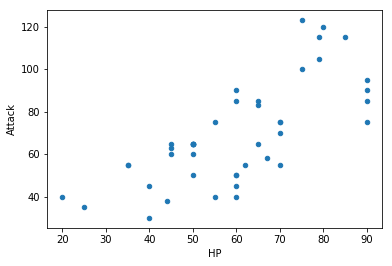

In [5]:
# Code starts here

# Conditional filtering for 'Electric' pokemons
electric = df[df['Type 1']=='Electric']

# Scatter plot for 'Attack' vs 'HP'
electric.plot.scatter(x='HP', y='Attack')

# Display plot
plt.show()

# Code ends here

## Hints
- To filter out only `'Electric'` type pokemons use `electric = df[df['Type 1']=='Electric']`
- Use `electric.plot.scatter(x='HP', y='Attack')` to generate a scatter plot comparing `HP` abd `Attack` to see any relationship if present between the two features
- Finally display the plot with `plt.show()`

### 2.4 Drawing multiple plots on the same figure using subplots

***

Till now you have drawn only a single plot within the figure. Many times you will be required to draw multiple plots on the same figure for better comparison. Remember the stacked bar chart that had every variant of `Type 1` and displayed their `Legendary` status? It was used to answer the question **Which type (`Type 1`) of Pokemons has the highest chances of being `Legendary`?**

A more better way would to answer this question is rather than getting the counts why don't we get the percentages and compare both the plots side by side? To achieve it i.e. place two plots side by side in the same figure we will use `.subplots()` method of matplotlib. Lets see how you can do it:

```python
# Initialize figure and axes
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))

# Stacked bar-chart representing counts
res = df.groupby(['Type 1', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')

# Stacked bar-chart representing percentages
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')
```
gives: 

<img src='../images/subplot.png'>

**It is very clear that the second plot (right one) gives a much better visualization and effectively answers our question as all the categories are on the same scale.**

So, what happened in the code snippet is described below:
- In the code snippet, we initialized two axes `ax_1` and `ax_2` along with the figure `fig` using `.subplots(1,2)` with figure size initiliazed by `figsize=(20,10)`.  
- The $1$ and $2$ inside `.subplots()` simply indicates the number of rows and number of columns in the figure and their product i.e. $1*2 = 2$ gives the number of plots or axes
- In the first axes i.e. `ax_1` we draw the stacked bar-chart representing the counts of `Type 1` pokemons with `Legendary` status. To specify the axes, we had used `ax=ax_1` argument inside `.plot()` in line number $6$
- The second axes `ax_2` gives the representation of percentages of `Legendary` Pokemons according to `Type 1` variants. To specify the axes, we had used `ax=ax_2` argument inside `.plot()` in line number $15$

## Different views on `Legendary` status for every generation

In this task you will visualize with the help of a stacked bar-chart which generation (`1,2,3,4,5,6`) has the highest chances of being `Legendary` with the help of percentages as well as counts

### Instructions
- You will be comparing two stacked bar-charts; one with percentages and the other with counts representing `Legendary` counts/percentages for every variant of `Type 1`
- Initialize two axes `ax_1` and `ax_2` using `.subplots(1,2, figsize=(20,10)`
- For the first plot, first group Pokemons by `Generation` and `Legendary` and then calculate the counts for every variant of generation based on legendary status (`True` or `False`). Save this to a variable `res`
- Plot a stacked bar chart in the first axes using `.plot(kind='bar', stacked=True, ax=ax_1)`
- For the second plot, make a new dataframe `new_res` by filling missing values of `res` with $0$ using `.fillna(0)`
- Convert the values in this frame to percentages in a manner similar to the code snippet given in the topic
- Plot the second stacked bar-chart using `ax=ax_2` inside the `.plot()` on `new_res`

Text(0.5, 1.0, 'Stacked bar-chart with percentages')

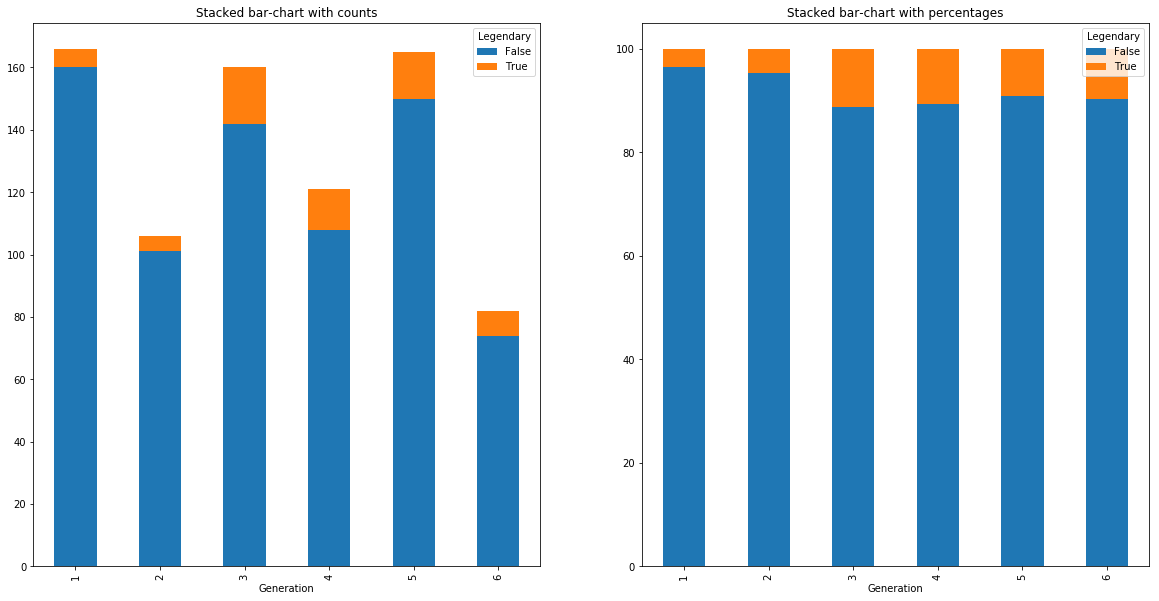

In [6]:
# Initialize figure and axes
fig, (ax_1,ax_2) = plt.subplots(1,2, figsize=(20,10))

# Stacked bar-chart representing counts
res = df.groupby(['Generation', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')

# Stacked bar-chart representing percentages
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')

## Hints
- First initialize figure and axes with `fig, (ax_1,ax_2) = plt.subplots(1,2, figsize=(20,10))`
- To group Pokemons by `Generation` and `Legendary` to calculate the counts and present it as a dataframe `res` use `res = df.groupby(['Generation', 'Legendary']).size().unstack()`
- You can draw a stacked bar-chart on the first plot using `res.plot(kind='bar', stacked=True, ax=ax_1)`
- Set the title of the first plot using `ax_1.set_title('Stacked bar-chart with counts')`
- Similarly to generate the second plot use
```python
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')
```

## Quiz

***

1. What kind of plot would you use to observe relationships between weight and height?

    a. scatter plot
    
    b. bar chart
    
    c. stacked bar chart
    
    d. histogram
    
**ANS:** a. scatter plot


2. What kind of plot would you use to observe height and weight distributions?

    a. scatter plot
    
    b. bar chart
    
    c. stacked bar chart
    
    d. histogram

**ANS:** d. histogram 

## Chapter 3: The art of visualization

### Description: In this chapter, we will look at how to use visualization as an effective tool for communicating results properly. 

### 3.1 Visualizing data effectively

***

Till now, our focus was on visualizing data through matplotlib and pandas. Let us abstract it out a bit and ask the question - how do we visualize data effectively? With every plot and figure we try to show, we must be able to convey the insights properly to the end audience. How do we achieve it through `matplotlib` and `pandas`? Let's get back to our friend - the pokemon enthusiast and find out what other questions he wants answer to. 

The enthusiast has asked the question - which type (`Type 1`) of Pokemons have the highest attack on an average?
The corresponding graph is 
![graph](../images/mean_attack.png)

This is a decent visualization. But the answer to our question is not visible clearly for it is lost in the multi-colored bars. So let's try to customize the graph, so that the answer we are trying to convey is highlighted the most. 

First let's sort the values so that all values are shown in descending order. And then let's look at the graph. 
![graph2](../images/mean_attack_sorted.png)

There are different styles available to use. Let's use one of them - `fivethirtyeight`. 
![graph3](../images/mean_attack_diff_style.png)


Looks much better. But trying to read the labels is difficult. Maybe flipping the graph would be better. Let's try and see if it becomes better to visualize. 
![graph4](../images/mean_attack_set.png)

In this visualization, the message we wanted to highlight - dragon type pokemon is having the highest mean attack comes out clearly. From the standpoint of proper aesthetic visualization, there are things yet to be done. But at the preliminary level, the graph is communicating the message we want it to. 

Now that we have a pretty good idea in doing visualization using python, let us keep some high level guidelines in mind while doing visualizations as data scientist in future. 

- Keep your audience in mind. 
    - Always be mindful of the audience you are creating the visuals for. Tailor it for the main stakeholder instead of pleasing everyone. 
- Make the message the hero.
    - Keep in mind the top insight you want to onboard for the audience. Make the visual convey that message only and tone down the rest. 
- Keep it simple.
    - Make the visual as simple as possible. A flashy visual doesn't mean it's a good visual.   
- Choose the right visual for your purpose.
    - Know the purpose clearly and choose the visual accordingly. Throughout the concept, you have seen which visuals need to be used for what purposes. 

These basic guidelines are good principles to think and implement whenever we are trying to create visualizations in our role as a data scientist. With this, we are ready to go forward in the next step of the journey as a data scientist. 
